In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/immo_data_202208_v2.csv', sep=',', skip_blank_lines=True, dtype=str)
print(df.shape)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
count_column = df.describe()[0:1]

count_column = count_column.transpose()
# order ascending
count_column = count_column.sort_values(by='count', axis=0)
# add procentual missing values
count_column['missing [%]'] = 100 - (count_column['count'] / df.shape[0] * 100)
count_column['missing absolute'] =  df.shape[0] - count_column['count']
count_column

In [ ]:
# find datapoint with most missing values
df[df.isnull().sum(axis=1) == df.isnull().sum(axis=1).max()]

In [ ]:
# count price on request
amount_price_on_request = df[df['price'] == 'Price on request']
amount_price_on_request

In [ ]:
# count unique values in column price
prices = df['price'].value_counts()
#filter where price does not contain 'CHF'
prices = prices[prices.index.str.contains('CHF') == False]
prices

In [ ]:
# remove price on request
df = df[df['price'] != 'Price on request']
df['price_cleaned'] = df['price_cleaned'].astype(float)

In [ ]:
(df['price_cleaned']/1000).plot.hist(bins=200)
plt.xlabel('Price in 1000 CHF')
plt.ylabel('Frequency')
plt.title('Histogram of prices')
plt.xlim(0, 5000)
plt.show()

In [ ]:
# show list of all columns ordered by price_cleaned asending
df = df.sort_values(by='price_cleaned', ascending=True)
df

In [ ]:
import pandas as pd

def compare_columns_percentage(df):
    # Erstelle ein leeres Dictionary, um die Übereinstimmung zu speichern
    similarity_info = {}
    
    # Vergleiche jede Spalte mit jeder anderen Spalte
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:  # Vermeide den Vergleich einer Spalte mit sich selbst
                # Vergleiche die Werte in jeder Zeile
                matching_rows = df[col1] == df[col2]
                matching_percentage = (matching_rows.sum() / len(df)) * 100  # Prozentuale Übereinstimmung
                
                # Speichere die Informationen nur, wenn es eine Übereinstimmung gibt
                if matching_percentage > 0:
                    similarity_info[(col1, col2)] = matching_percentage
    
    # Erstelle ein DataFrame aus dem Dictionary, um die Ergebnisse anzuzeigen
    similarity_df = pd.DataFrame.from_dict(similarity_info, orient='index', columns=['Percentage'])
    similarity_df.index = pd.MultiIndex.from_tuples(similarity_df.index, names=["Column 1", "Column 2"])
    
    # Sortiere die Ergebnisse nach der höchsten Übereinstimmung
    similarity_df = similarity_df.sort_values(by="Percentage", ascending=False)
    
    return similarity_df

# Beispiel-Aufruf mit deinem DataFrame (df)
similarity_df = compare_columns_percentage(df)
# Display the results
print(similarity_df)


In [ ]:
similarity_df

In [ ]:
#df_droped_columns = df.drop(columns=['Unnamed: 0', 'plz', 'Living_area_unified', 'type', 'Availability', 'Municipality', 'Living space', 'Living_space_merged', 'address_s', 'location', 'space_cleaned', 'description', 'detailed_description', 'url', 'table', 'detail_responsive#municipality', 'detail_responsive#surface_living', 'detail_responsive#floor', 'detail_responsive#available_from', 'Minimum floor space:', 'Superficie utile', 'Gross return', 'Piano', 'Superficie del terreno', 'Surface utile', 'Gross yield:', 'Étage', 'Surface du terrain', 'Superficie abitabile', 'Comune', 'Disponibilità', 'Nutzfläche'])

In [ ]:
columns_to_drop = count_column[count_column['missing [%]'] > 50].index
columns_to_drop

In [ ]:
df_droped_columns = df.drop(columns=columns_to_drop)
df_droped_columns

# Analyse der Wohnungsdaten
## Flächenattribute

In [ ]:
columns_wohnung_attr = ['type'
                        , 'type_unified'
                        , 'rooms'
                        , 'Space extracted'
                        , 'Living_area_unified'
                        , 'Availability_merged'
                        , 'Availability'
                        , 'Living_space_merged'
                        , 'Living space'
                        , 'Floor'
                        , 'address_s'
                        , 'space'
                        , 'space_cleaned'
                        , 'Surface living:'
                        , 'No. of rooms:'
                        , 'Plot_area_unified'
                        , 'Year built:'
                        , 'Floor space'
                        , 'Floor_space_merged'
                        , 'Land area:'
                        , 'Plot area'
                        , 'Plot_area_merged'
                        , 'Floor_unified'
                        , 'Floor_merged'
                        , 'detail_responsive#floor'
                        , 'Room height:'
                        , 'detail_responsive#surface_living'
                        , 'detail_responsive#municipality'
                        , 'detail_responsive#available_from'
                        , 'Number of apartments:'
                        , 'Volume:'
                        , 'Last refurbishment:'
                        , 'Number of floors:'
                        , 'Floor space:'
                        , 'Surface habitable'
                        , 'Stockwerk'
                        , 'Disponibilité'
                        , 'Number of toilets:'
                        , 'detail_responsive#surface_usable'
                        , 'Wohnfläche'
                        , 'detail_responsive#surface_property'
                        , 'Verfügbarkeit'
                        , 'Superficie del terreno'
                        , 'Surface utile'
                        , 'Étage'
                        , 'Surface du terrain'
                        , 'Superficie abitabile'
                        , 'Disponibilità'
                        , 'Nutzfläche'
                        , 'Grundstücksfläche'
                        , 'Minimum floor space:'
                        , 'Superficie utile'
                        , 'Piano'
                        ]
df_wohung_flächenattr = df[columns_wohnung_attr]
df_wohung_flächenattr

In [ ]:
# count nan values per column
nans_wohnung = df_wohung_flächenattr.isna().sum()
nans_wohnung

In [ ]:
columns_duplicated_space_attr = [
                        'Space extracted'
                        , 'Living_area_unified'
                        , 'Living_space_merged'
                        , 'Living space'
                        , 'space'
                        , 'space_cleaned'
                        , 'Surface living:'
                        , 'Plot_area_unified'
                        , 'Floor space'
                        , 'Floor_space_merged'
                        , 'Land area:'
                        , 'Plot area'
                        , 'Plot_area_merged'
                        , 'detail_responsive#surface_living'
                        , 'Volume:'
                        , 'Floor space:'
                        , 'Surface habitable'
                        , 'detail_responsive#surface_usable'
                        , 'Wohnfläche'
                        , 'detail_responsive#surface_property'
                        , 'Superficie del terreno'
                        , 'Surface utile'
                        , 'Surface du terrain'
                        , 'Superficie abitabile'
                        , 'Nutzfläche'
                        , 'Grundstücksfläche'
                        , 'Minimum floor space:'
                        , 'Superficie utile'
]
df_wohung_flächenattr = df[columns_duplicated_space_attr]
df_wohung_flächenattr

In [ ]:
nans_wohnung = df_wohung_flächenattr.isna().sum()
nans_wohnung

In [ ]:
from src.dataPipeline import DataPipeline as dp
from sklearn.impute import SimpleImputer

dp = dp()
dp.read_csv('../data/immo_data_202208_v2.csv')
dp.drop_columns([
    'Living_area_unified'
    ,'Living_space_merged'
    ,'Living space'
    ,'space'
    ,'space_cleaned'
    ,'Surface living:'
    ,'Wohnfläche'
    ,'Superficie abitabile'
])
dp.impute_missing_values(imputer=SimpleImputer(strategy='most_frequent'))
dp.get_data()

In [ ]:
for column in df.columns:
    print(column, df[column][0])


Stockwerk

In [ ]:
# drop rows where every value is missing

temp = df[['Floor_unified', 'Floor_merged', 'Étage', 'Piano', 'Stockwerk', 'detail_responsive#floor', 'Floor']]
temp.dropna(how='all').isna().sum()


In [ ]:
temp = df[['Floor_unified', 'Floor_merged', 'Étage', 'Piano', 'Stockwerk', 'detail_responsive#floor', 'Floor']]
temp['Floor'] = temp[['Floor', 'detail_responsive#floor', 'Floor_merged']].bfill(axis=1)['Floor']
temp.isna().sum()

Wohnfläche

In [ ]:
temp = df[['Living space', 'Wohnfläche', 'detail_responsive#surface_living', 'Surface habitable', 'Superficie abitabile', 'Living_space_merged', 'Space extracted', 'Living_area_unified', 'space', 'Surface living:', 'space_cleaned']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Living space', 'Wohnfläche', 'detail_responsive#surface_living', 'Surface habitable', 'Superficie abitabile', 'Living_space_merged', 'Space extracted', 'Living_area_unified', 'space', 'Surface living:', 'space_cleaned']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp['Space extracted'] = temp[['Space extracted', 'detail_responsive#surface_living']].bfill(axis=1)['Space extracted']
temp.isna().sum()

Grundstücksfläche

In [ ]:
temp = df[['Plot area', 'Grundstücksfläche', 'detail_responsive#surface_property', 'Surface du terrain', 'Superficie del terreno', 'Plot_area_merged', 'Plot_area_unified', 'Land area:']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Plot_area_unified','Plot area', 'Grundstücksfläche', 'detail_responsive#surface_property', 'Surface du terrain', 'Superficie del terreno', 'Plot_area_merged', 'Land area:']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp['Plot_area_unified'] = temp[['Plot_area_unified', 'detail_responsive#surface_property', 'Plot_area_merged']].bfill(axis=1)['Plot_area_unified']
temp.isna().sum()

Nutzfläche

In [ ]:
temp = df[['Nutzfläche', 'detail_responsive#surface_usable', 'Surface utile', 'Superficie utile']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Nutzfläche', 'detail_responsive#surface_usable', 'Surface utile', 'Superficie utile']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp['detail_responsive#surface_usable'] = temp[['detail_responsive#surface_usable', 'Nutzfläche', 'Surface utile', 'Superficie utile']].bfill(axis=1)['detail_responsive#surface_usable']
temp.isna().sum()

Stockwerksfläche

In [ ]:
temp = df[['Floor space', 'Floor_space_merged']]
temp.dropna(how='all').isna().sum()

Floor_space_merged bereits vorhanden

Number of rooms

In [ ]:
temp = df[['No. of rooms:', 'rooms']]

In [ ]:
temp['No. of rooms:'] = temp[['No. of rooms:', 'rooms']].bfill(axis=1)['No. of rooms:']
temp.isna().sum()

Availability

In [ ]:
temp = df[['Availability', 'detail_responsive#available_from', 'Disponibilité', 'Disponibilità','Availability_merged']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Availability', 'detail_responsive#available_from', 'Disponibilité', 'Disponibilità','Availability_merged']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp['Availability'] = temp[['Availability', 'detail_responsive#available_from', 'Availability_merged', 'Verfügbarkeit', 'Disponibilité', 'Disponibilità']].bfill(axis=1)['Availability']
temp.isna().sum()

In [ ]:
temp = df.drop(columns=[
'Unnamed: 0.1'
,'Unnamed: 0'
,'Living space'
,'Plot area'
,'Floor space'
,'location'
,'description'
,'detailed_description'
,'url'
,'table'
,'detail_responsive#surface_living'
,'detail_responsive#floor'
,'Wohnfläche'
,'Stockwerk'
,'Nutzfläche'
,'Grundstücksfläche'
,'detail_responsive#surface_property'
,'Surface habitable'
,'Surface du terrain'
,'Surface utile'
,'Étage'
,'Superficie abitabile'
,'Gross return'
,'Piano'
,'Superficie del terreno'
,'Superficie utile'
,'Floor_merged'
,'Living_space_merged'
,'Plot_area_merged'
,'location_parsed'
,'title'
,'details'
,'address'
,'link'
,'details_structured'
,'Floor_unified'
,'Living_area_unified'
,'provider'
,'space'
,'address_s'
,'rooms'
,'Surface living:'
,'Land area:'
,'Room height:'
,'features'
,'description_detailed'
,'Floor space:'
,'Volume:'
,'Number of toilets:'
,'Gross yield:'
,'Minimum floor space:'
,'space_cleaned'
])
temp

### Test Datapipeline

In [1]:
columns_to_drop_all=[
'Unnamed: 0.1'
,'Unnamed: 0'
,'Municipality'
,'Living space'
,'Plot area'
,'Floor space'
,'location'
,'description'
,'detailed_description'
,'url'
,'table'
,'detail_responsive#municipality'
,'detail_responsive#surface_living'
,'detail_responsive#floor'
,'detail_responsive#available_from'
,'Gemeinde'
,'Wohnfläche'
,'Stockwerk'
,'Nutzfläche'
,'Verfügbarkeit'
,'Grundstücksfläche'
,'detail_responsive#surface_property'
,'Commune'
,'Surface habitable'
,'Surface du terrain'
,'Surface utile'
,'Disponibilité'
,'Étage'
,'Comune'
,'Superficie abitabile'
,'Disponibilità'
,'Gross return'
,'Piano'
,'Superficie del terreno'
,'Superficie utile'
,'Municipality_merged'
,'Floor_merged'
,'Living_space_merged'
,'Plot_area_merged'
,'Availability_merged'
,'location_parsed'
,'title'
,'price'
,'details'
,'address'
,'link'
,'details_structured'
,'lat'
,'lon'
,'index'
,'Latitude'
,'Locality'
,'Longitude'
,'Zip'
,'rooms'
,'type_unified'
,'Floor_unified'
,'Living_area_unified'
,'provider'
,'space'
,'price_s'
,'address_s'
,'Surface living:'
,'Land area:'
,'Room height:'
,'features'
,'description_detailed'
,'Floor space:'
,'Volume:'
,'plz'
,'Number of toilets:'
,'Gross yield:'
,'Minimum floor space:'
,'space_cleaned'
]

In [2]:
from src.dataPipeline import DataPipeline as DataPipeline
from sklearn.impute import KNNImputer

dp = DataPipeline()
dp.read_csv('../data/immo_data_202208_v2.csv')
dp.merge_columns()
dp.drop_columns(columns=columns_to_drop_all)
dp.clean_data()
dp.encode_categorical_features()
dp.impute_missing_values(imputer=KNNImputer(n_neighbors=5))
df_clean = dp.get_data()

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:27: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(file_path)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data['Space extracted'] = self.data[['Space extracted', 'detail_responsive#surface_living']].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is dep

In [3]:
df_clean

,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,4.0,187.2,204.2,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,0.058298,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.8,191.8,242.0,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,0.058298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,162.0,100.8,0.163362,0.095877,0.001911,0.000000,0.000000,0.000000,0.334957,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.2,191.8,257.0,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,0.058298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,197.6,228.0,0.333865,0.279276,0.145835,0.000000,0.000000,0.000000,0.133498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,0.8,67.8,99.6,0.495715,0.385885,0.097278,0.000000,0.000000,0.000000,0.236514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21462,2.2,207.2,255.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21463,1.4,233.2,281.8,0.000000,0.000000,0.000000,0.052609,0.083575,0.027766,0.306761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21464,0.8,167.8,160.8,0.410843,0.151363,0.038351,0.000000,0.000000,0.000000,0.198066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


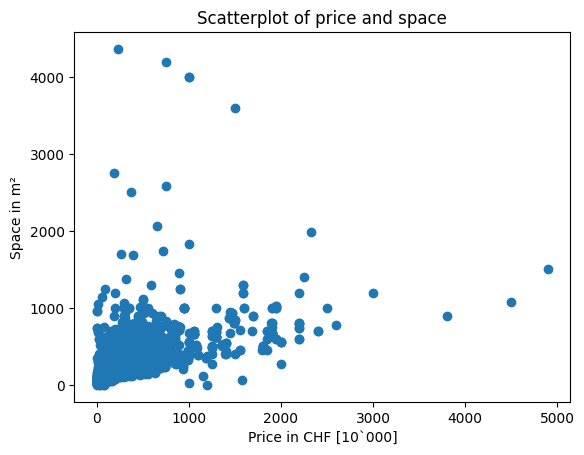

In [9]:
# Plot scatterplot of price_cleaned and space extracted
plt.scatter(df_clean['price_cleaned']/10000, df_clean['Space extracted'])
plt.xlabel('Price in CHF [10`000]')
plt.ylabel('Space in m²')
plt.title('Scatterplot of price and space')
plt.show()

Make random forest model to predict price_cleaned

In [24]:
# Make random forest model to predict price_cleaned
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# use mape as metric
from sklearn.metrics import mean_absolute_percentage_error

X = df_clean.drop(columns=['price_cleaned'])
y = df_clean['price_cleaned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mape

np.float64(0.03272926092071091)

In [1]:
from src.dataPipeline import DataPipeline as DataPipeline
from sklearn.impute import KNNImputer

dp = DataPipeline()
knnImputer = KNNImputer(n_neighbors=10)
df_cleaned = dp.run_pipeline(imputer=knnImputer)
df_cleaned

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:36: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(file_path)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data['Space extracted'] = self.data[['Space extracted', 'detail_responsive#surface_living']].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is dep

,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,...,type_penthouse,type_rustico,type_secondary-suite,type_semi-detached-house,type_single-room,type_stepped-apartment,type_stepped-house,type_studio,type_terrace-house,type_villa
0,4.0,186.2,189.8,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,0.058298,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.6,201.3,242.0,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,0.058298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,206.7,122.3,0.163362,0.095877,0.001911,0.000000,0.000000,0.000000,0.334957,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.2,201.3,257.0,0.511176,0.286451,0.090908,0.000000,0.000000,0.000000,0.058298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,170.9,176.8,0.333865,0.279276,0.145835,0.000000,0.000000,0.000000,0.133498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,1.5,88.8,94.0,0.495715,0.385885,0.097278,0.000000,0.000000,0.000000,0.236514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21462,1.9,196.7,226.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21463,1.1,201.3,308.8,0.000000,0.000000,0.000000,0.052609,0.083575,0.027766,0.306761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21464,1.1,202.4,184.9,0.410843,0.151363,0.038351,0.000000,0.000000,0.000000,0.198066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
